In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
#アナコンダプロンプトへpip install mglearnを入力して取得。F

%matplotlib inline

w[0]: 0.393906  b: -0.031804


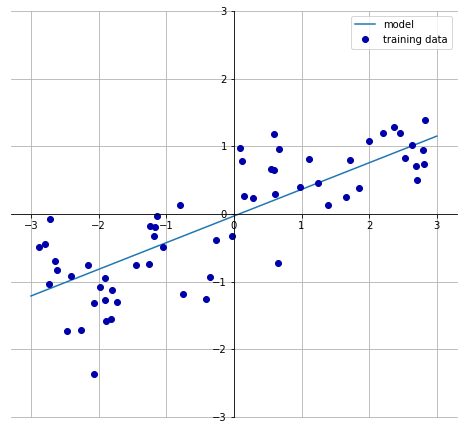

In [3]:
#p46

mglearn.plots.plot_linear_regression_wave()
#一次元のwaveデータでの線形回帰式　ｙ^=w[0]*x[0]+b の傾きw[0]と切片bを求める。

In [4]:
#p48

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#sklearn　パッケージ名
#linear_model サブパッケージ名
#LinearRegression モジュール名？

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)
#fit 関数名。「モジュール.メソッド（）」で使用。関数とメソッドの違い？

print("lr.coef_: {}".format(lr.coef_))
#メソッド名format内の引数lr.coef_を辞書型オブジェクトとして{}の枠組に代入
#lr.coef_はLinearRegressionで計算してcoef_属性へ格納した係数(線形予測の傾き)
print("lr.intercept_: {}".format(lr.intercept_))
#coefやinterceptは{:.2f}ができない。後述のscoreとは型が違うらしい。

print("Taining set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))
#訓練セットとテストセットそれぞれに対する決定係数

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746
Taining set score: 0.67
Test set score: 0.66


参考書によるとR^2＝0.66はあまり良くないらしい

In [5]:
#p50 リッジ回帰…訓練データの予測に加えて、特徴量による影響を最適化（L2正則化）

from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=0)

ridge = Ridge().fit(X_train, y_train)

print("Taining set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Taining set score: 0.89
Test set score: 0.75


In [6]:
#p51 リッジ回帰で調整できるパラメータalpha

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
#ユーザー側がモデルの簡潔さ（係数が0に近くなる特徴量の数）と訓練セットに対する性能を正則パラメータalphaで調整できる
#前述のRidgeのようにalpha記述なしの場合はalpha=1
print("Taining set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Taining set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Taining set score: 0.79
Test set score: 0.64
Taining set score: 0.93
Test set score: 0.77


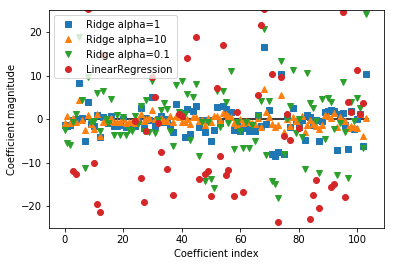

In [7]:
#p52 前述のalpha=0.1,1,10の3パターンにおける各特徴量の係数の大きさを比較する
lr = LinearRegression().fit(X_train, y_train)

plt.plot(ridge.coef_,"s", label="Ridge alpha=1")
plt.plot(ridge10.coef_,"^", label="Ridge alpha=10")
plt.plot(ridge01.coef_,"v", label="Ridge alpha=0.1")

plt.plot(lr.coef_,"o", label="LinearRegression")
plt.xlabel("Coefficient index")
#係数番号

plt.ylabel("Coefficient magnitude")
#係数の大きさ

plt.hlines(0,0,len(lr.coef_))
#plt.hlines(yの値,xmin,xmax)で書かれている。またcolorやlinewidthの値で色や線の太さが可能。

plt.ylim(-25,25)
plt.legend()

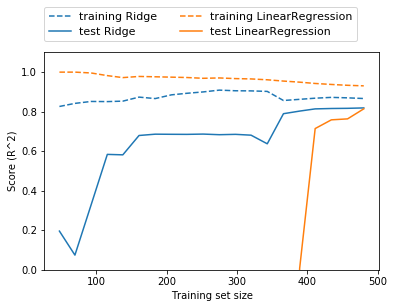

In [8]:
mglearn.plots.plot_ridge_n_samples()
#mglearn内で定義されているメソッド　　メソッド一覧　https://github.com/amueller/mglearn/blob/master/mglearn/plots.py
#訓練やテストデータのサイズとそれぞれの回帰でのR^2のスコア

In [9]:
#p54 Lasso回帰（L1正則化）

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
#!= 等しくない
#np.sum() axisを指定しなければすべての要素を足す
#lassoでは係数が0となる特徴量がある。今回は係数が0でない特徴量（回帰に使っている特徴量）の数を求めている。
#format以降のコードが特徴量の係数を足しているように見える？

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Training set score: 0.90
Test set score: 0.77
Number of features used: 33
Training set score: 0.95
Test set score: 0.64
Number of features used: 94


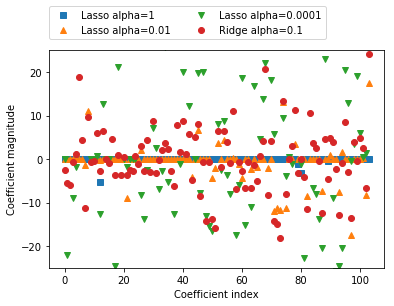

In [10]:
#p54 Lasso回帰　パラメータalpha0.01と0.0001で比較

#alpha=0.01
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
#max_iter 最大繰り返し回数
#Lasso,Ridge それぞれの正則化項について　https://qiita.com/satopirka/items/71916560f7efc6eededf
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

#alpha=0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

#グラフ描画
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
#ncol 凡例の列数を指定

plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")


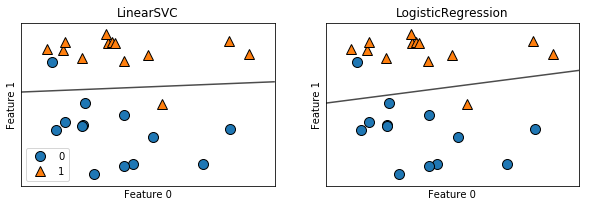

In [11]:
#p57 線形でのクラス分類
#サポートベクターマシンとロジスティック回帰（L2正則化）

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

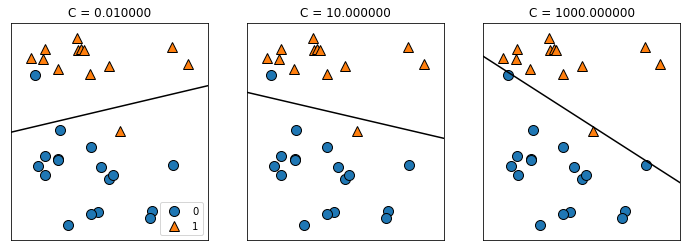

In [12]:
mglearn.plots.plot_linear_svc_regularization()
#mglearn内で定義されているメソッド　https://github.com/amueller/mglearn/blob/master/mglearn/plot_linear_svc_regularization.py
#SVCの正則化パラメータCを0.01,10,1000の3パターンで比較

In [13]:
#p59 ロジスティック回帰でcancerデータを解析　C=1,100,0.01でスコア比較

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#C=1
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

#C=100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

#C=0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))


Training set score: 0.955
Test set score: 0.958
Training set score: 0.972
Test set score: 0.965
Training set score: 0.934
Test set score: 0.930


p30 図2-1参照
複雑さと制度の関係が、スイートスポットの左側で説明できる。

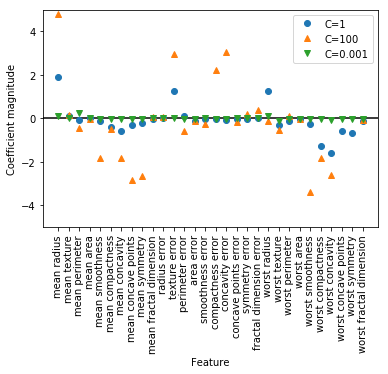

In [14]:
#p61　上述の3パターンについて特徴量ごとに、係数の大きさとクラス分類を視覚化

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
#xticks x軸の目盛りに書かれた文字も大きさを変更。xticks(変更前の目盛り,変更後の目盛り)
#rotation オブジェクトの回転
#range 範囲を示す。今回はcancerの一行目要素数
#shape

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

係数がクラス分類に影響を与えているものがある

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


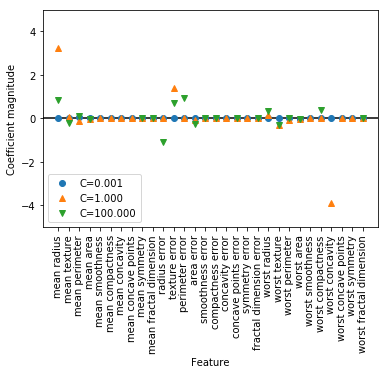

In [15]:
#p62 L1正則化で上述と同様の解析

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


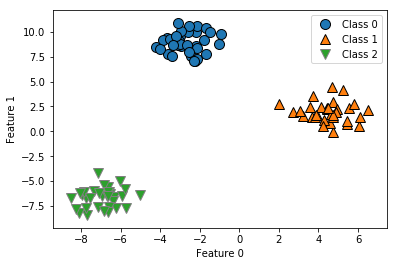

In [16]:
#p64 線形モデルによる多クラス分類

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
#係数配列の形状
print("Intercept shape: ", linear_svm.intercept_.shape)
#切片配列の形状

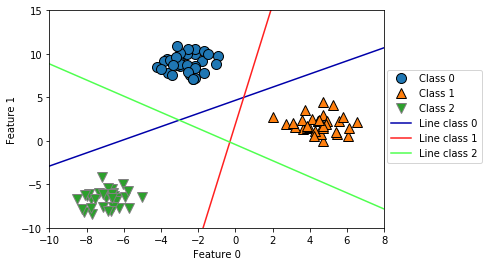

In [17]:
#p65 coef_,intercept_に格納されている係数と切片を可視化

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
#linespace 指定した範囲に行ベクトルを描画。linescape(始点,終点)の形式で記述。

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
#for文に組み込むことで線を複数引く1対その他かできる。

    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

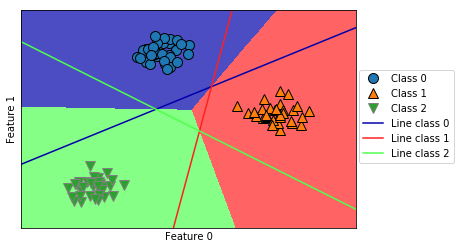

In [18]:
#p66 グラフでその他と分類される個所の処理　クラス分類式の値が一番大きいクラスへ分類

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


In [19]:
#p67 メソッドチェーン

logreg = LogisticRegression().fit(X_train, y_train)
#1行でモデルのインスタンスを生成して訓練

logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)
#メソッドチェーン　.fitと.predictを続けて書く方法

y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
#モデルのインスタンス生成をメソッドチェーンと組み合わせる方法
#ロジスティック回帰のモデルを格納できない　※前述のlogregのようなものが作れない

In [20]:
#p68 ナイーブベイズクラス分類器
#アルゴリズム　https://qiita.com/yshi12/items/8a66deeb6e944b832739

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
#観測データ4つ0と1で記述。クラスはyを見ると0と1へ分別
#クラス0のデータポイント（X1行目3行目）では、1つめの特徴量は0が2つ、非ゼロが0。
#クラスごとに、該当した行の各特徴量について非ゼロの数を数えていく。

counts = {}
for label in np.unique(y):
#unique 指定した行列の要素の重複をなくす。

    counts[label] = X[y == label].sum(axis=0)
#counts[label] = X[y == label] y=0のときのXをそれぞれcounts内に0と1に分けて格納

print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


各特徴量の数が分かる